# EXPERIMENT 4 Data Fitting

In [1]:
from pylab import*
from scipy.optimize import curve_fit

In [3]:
x_data,y_data =loadtxt('data',unpack=True)

In [4]:
x_data

array([12.299, 11.399, 10.899, 10.299,  9.499,  9.199])

In [5]:
y_data

array([3.199, 2.599, 2.25 , 1.809, 1.309, 1.119])

In [7]:
def linearfunction(x,intercept,slope):
    y = intercept+slope * x
    return y

linearfunction(1,2,3)

5

In [8]:
a_fit,cov=curve_fit(linearfunction,x_data,y_data)

In [9]:
print(a_fit)

[-5.10574661  0.67489826]


In [10]:
print(cov)

[[ 7.14409489e-03 -6.67224304e-04]
 [-6.67224304e-04  6.29516283e-05]]


In [12]:
inter =a_fit[0]
slope =a_fit[1]

In [13]:
d_inter = sqrt(cov[0][0])
d_slope = sqrt(cov[1][1])

In [14]:
d_slope

0.007934206216041078

Text(0.5, 1.0, 'plot with fit')

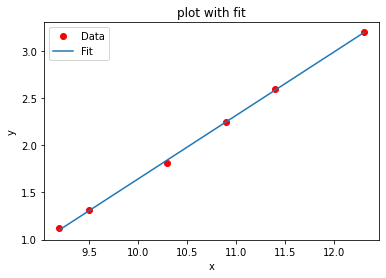

In [15]:
plot(x_data,y_data,'ro',label='Data')
yfit = inter + slope*x_data
plot(x_data,yfit,label='Fit')
legend()
xlabel('x')
ylabel('y')
title('plot with fit')

In [16]:
print(f'Slope = {slope}, Uncertainty {d_slope}')
print(f'Intercept = {inter}, Uncertainty {d_inter}')

Slope = 0.6748982558483031, Uncertainty 0.007934206216041078
Intercept = -5.105746613736164, Uncertainty 0.08452274773954101


## With Error

In [17]:
xdata,ydata,d_y = loadtxt('datae',unpack=True)

In [18]:
def linearFunc(x,intercept,slope):
 y = intercept + slope * x
 return y

In [19]:
print(xdata)
print(ydata)
print(d_y)

[12.299 11.399 10.899 10.299  9.499]
[3.199 2.599 2.25  1.809 1.309]
[0.0771 0.0459 0.0708 0.0783 0.0893]


In [20]:
def linearFunc(x,intercept,slope):
 y = intercept + slope * x
 return y

In [21]:
a_fit,cov=curve_fit(linearFunc,xdata,ydata,sigma=d_y)

In [22]:
inter = a_fit[0] 
slope = a_fit[1]
d_inter = sqrt(cov[0][0])
d_slope = sqrt(cov[1][1])

Text(0, 0.5, 'y')

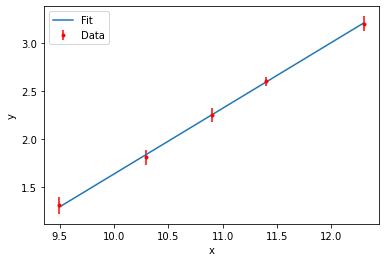

In [23]:
errorbar(xdata,ydata,yerr=d_y,fmt='r.',label='Data')# Compute a best fit line from the fit intercept and slope.
yfit = inter + slope*xdata
plot(xdata,yfit,label='Fit')
legend()
xlabel('x')
ylabel('y')

In [24]:
print(f'Slope = {slope}, Uncertainty {d_slope}')
print(f'Intercept = {inter}, Uncertainty {d_inter}')

Slope = 0.6838585770483732, Uncertainty 0.010154559972996142
Intercept = -5.204263723855613, Uncertainty 0.11275574610984589


In [25]:
chisqr = sum((ydata-linearFunc(xdata,inter,slope))**2/d_y**2)
dof = len(ydata) - 2
chisqr_red = chisqr/dof
print(f'Reduced chi^2 = {chisqr_red}')

Reduced chi^2 = 0.07400804089852749
